In [1]:
#Import Processing setup
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import webbrowser

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 286kB 6.2MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


# Data Processing

In [2]:
#link data
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-18 12:43:04--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  46.4MB/s   in 1.5s   

2020-10-18 12:43:06 (46.4 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
#Import and read dataframe
df = pd.read_csv('Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Check dataframe shape
df.shape

(194673, 38)

In [5]:
#Remove elements with null values, undefined or other in WEATHER, ROADCOND, or LIGHTCOND 

# Drop all rows with null values in WEATHER, ROADCOND, LIGHTCOND and SEVERITYCODE

df=df.dropna(subset=['WEATHER', 'ROADCOND','LIGHTCOND'])
#print shape to verify rows dropped

print(df.shape)


(189337, 38)


In [6]:
# Drop all rows with Other or Unknown values in WEATHER, ROADCOND, LIGHTCOND and SEVERITYCODE
df=df[df.WEATHER != 'Unknown']
df=df[df.WEATHER != 'Other']

df=df[df.ROADCOND != 'Unknown']
df=df[df.ROADCOND != 'Other']

df=df[df.LIGHTCOND != 'Unknown']
df=df[df.LIGHTCOND != 'Other']

#Drop spurious columns x, y, COLDETKEY, REPORTNO, STATUS, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR
df=df.drop(columns=['X', 'Y','COLDETKEY','REPORTNO', 'STATUS','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'])
#print shape to verify rows dropped
print(df.shape)

(169957, 27)


In [7]:
#Check scrubbed dataframe
df.head(100)

,SEVERITYCODE,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,1,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,2,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,3,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,4,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,5,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN
5,1,6,320840,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN
6,1,7,83300,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN
7,2,9,330897,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN
8,1,10,63400,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN
9,2,12,58600,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN


In [8]:
#Check IncKey and df shape to verify unqiue numbers
print(df['INCKEY'].nunique())

print(df.shape)

df['SPEEDING'].value_counts()


169957
(169957, 27)


Y    9085
Name: SPEEDING, dtype: int64

In [9]:
#Encode key variables numerically

#Encoding Light Conditions
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 3, inplace=True)
df["LIGHTCOND"].replace("Dawn", 4, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 5, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 6, inplace=True)


#Encoding Weather Conditions
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 1, inplace=True)
df["WEATHER"].replace("Overcast", 2, inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 4, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 5, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 6, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 7, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 8, inplace=True)

#Encoding Road Conditions
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 1, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 3, inplace=True)
df["ROADCOND"].replace("Standing Water", 4, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 5, inplace=True)
df["ROADCOND"].replace("Oil", 6, inplace=True)

#Encode SPEEDING, INATTENTIONIND and UNDERINFL
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace(np.nan, 0, inplace=True)


df["SPEEDING"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["SPEEDING"].replace("N", 0, inplace=True)
df["INATTENTIONIND"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("N", 0, inplace=True)



df.head(10)

,SEVERITYCODE,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,1,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,2,1,0,NaN,0
1,1,2,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,1,1,1,NaN,0
2,1,3,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,2,0,0,NaN,0
3,1,4,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
4,2,5,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,1,1,0,NaN,0
5,1,6,320840,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
6,1,7,83300,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,1,1,0,NaN,0
7,2,9,330897,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,0,0,0,0,NaN,0
8,1,10,63400,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0
9,2,12,58600,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,0,NaN,0


In [10]:
#Making new dataframe with only variables and unique keys
selected_columns=df[["INCKEY","INCDTTM","WEATHER","UNDERINFL","ROADCOND","LIGHTCOND","SPEEDING","INATTENTIONIND","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

feature_df.head(10)

,INCKEY,INCDTTM,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,SEVERITYCODE
0,1307,3/27/2013 2:54:00 PM,2,0,1,0,0,0,2
1,52200,12/20/2006 6:55:00 PM,1,0,1,1,0,0,1
2,26700,11/18/2004 10:20:00 AM,2,0,0,0,0,0,1
3,1144,3/29/2013 9:26:00 AM,0,0,0,0,0,0,1
4,17700,1/28/2004 8:04:00 AM,1,0,1,0,0,0,2
5,320840,4/20/2019 5:42:00 PM,0,0,0,0,0,0,1
6,83300,12/9/2008,1,0,1,0,0,0,1
7,330897,4/15/2020 5:47:00 PM,0,0,0,0,0,0,2
8,63400,6/15/2006 1:00:00 PM,0,0,0,0,0,0,1
9,58600,3/20/2006 3:49:00 PM,0,0,0,0,0,0,2


In [11]:
#Check Speeding, InnatentionID
print (feature_df[feature_df.SPEEDING == 1].count())
print (feature_df[feature_df.INATTENTIONIND == 1].count())

feature_df['SPEEDING'].value_counts()

INCKEY            9085
INCDTTM           9085
WEATHER           9085
UNDERINFL         9085
ROADCOND          9085
LIGHTCOND         9085
SPEEDING          9085
INATTENTIONIND    9085
SEVERITYCODE      9085
dtype: int64
INCKEY            28558
INCDTTM           28558
WEATHER           28558
UNDERINFL         28558
ROADCOND          28558
LIGHTCOND         28558
SPEEDING          28558
INATTENTIONIND    28558
SEVERITYCODE      28558
dtype: int64


0    160872
1      9085
Name: SPEEDING, dtype: int64

In [12]:
#Break down the dataframe into Severity 1 data and Severity 2 data t0 allow correlations to be explored
#Severity 1 dataframe

Sev1_df=feature_df[feature_df.SEVERITYCODE != 2]

#Severity 2 dataframe

Sev2_df=feature_df[feature_df.SEVERITYCODE != 1]


In [13]:
#Break down the dataframe into Severity 1 data and Severity 2 data with no compounding factors (no speeding, no inattention, no intoxication)
#Severity 1 dataframe

aSev1_df=Sev1_df[Sev1_df.UNDERINFL != 1]

bSev1_df=aSev1_df[aSev1_df.SPEEDING != 1]

cleanSev1_df=bSev1_df[bSev1_df.INATTENTIONIND != 1]

#Severity 2 dataframe

aSev2_df=Sev2_df[Sev2_df.UNDERINFL != 1]

bSev2_df=aSev2_df[aSev2_df.SPEEDING != 1]

cleanSev2_df=bSev2_df[bSev2_df.INATTENTIONIND != 1]


print(Sev2_df.shape)
print(Sev1_df.shape)

print(cleanSev2_df.shape)
print(cleanSev1_df.shape)



(55683, 9)
(114274, 9)
(40857, 9)
(88259, 9)


# Data Exploration

Accidents classified in each level of severity:
1    114274
2     55683
Name: SEVERITYCODE, dtype: int64


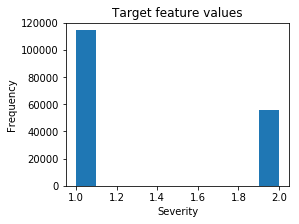

In [16]:
#Initial severity range checks
feature_df.SEVERITYCODE.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.SEVERITYCODE.value_counts())

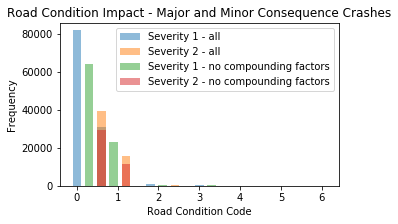

In [17]:
#SeverityCode 1 - ROADCOND

Sev1_df.ROADCOND.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35,  align = "left", label = "Severity 1 - all")

Sev2_df.ROADCOND.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35, align = "right", label = "Severity 2 - all")

cleanSev1_df.ROADCOND.plot.hist(figsize=(5,3), align = "mid", alpha=0.5, rwidth=0.35,  label = "Severity 1 - no compounding factors")

cleanSev2_df.ROADCOND.plot.hist(figsize=(5,3), align = "right", alpha=0.5, rwidth=0.35,  label = "Severity 2 - no compounding factors")


plt.title('Road Condition Impact - Major and Minor Consequence Crashes')
plt.xlabel('Road Condition Code')
plt.ylabel('Frequency')
plt.legend()

In [18]:
print(Sev2_df.ROADCOND.value_counts(),Sev1_df.ROADCOND.value_counts(),cleanSev2_df.ROADCOND.value_counts(),cleanSev1_df.ROADCOND.value_counts())

0    39658
1    15533
2      263
3      155
4       28
6       24
5       22
Name: ROADCOND, dtype: int64 0    81832
1    30791
2      817
3      678
4       77
5       43
6       36
Name: ROADCOND, dtype: int64 0    29322
1    11241
2      142
3       99
6       22
5       16
4       15
Name: ROADCOND, dtype: int64 0    64254
1    22902
2      533
3      463
5       37
4       37
6       33
Name: ROADCOND, dtype: int64


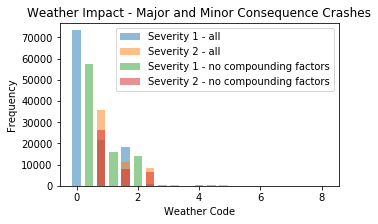

In [19]:
#SeverityCode 1 - Weather

Sev1_df.WEATHER.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35,  align = "left", label = "Severity 1 - all")

Sev2_df.WEATHER.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35, align = "right", label = "Severity 2 - all")

cleanSev1_df.WEATHER.plot.hist(figsize=(5,3), align = "mid", alpha=0.5, rwidth=0.35,  label = "Severity 1 - no compounding factors")

cleanSev2_df.WEATHER.plot.hist(figsize=(5,3), align = "right", alpha=0.5, rwidth=0.35,  label = "Severity 2 - no compounding factors")


plt.title('Weather Impact - Major and Minor Consequence Crashes')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.legend()


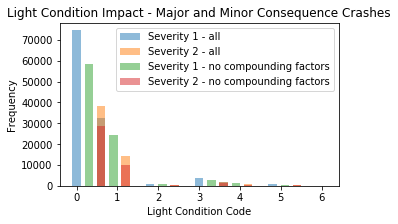

In [20]:
#SeverityCode 1 - LIGHTCOND

Sev1_df.LIGHTCOND.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35,  align = "left", label = "Severity 1 - all")

Sev2_df.LIGHTCOND.plot.hist(figsize=(5,3), alpha=0.5, rwidth=0.35, align = "right", label = "Severity 2 - all")

cleanSev1_df.LIGHTCOND.plot.hist(figsize=(5,3), align = "mid", alpha=0.5, rwidth=0.35,  label = "Severity 1 - no compounding factors")

cleanSev2_df.LIGHTCOND.plot.hist(figsize=(5,3), align = "right", alpha=0.5, rwidth=0.35,  label = "Severity 2 - no compounding factors")


plt.title('Light Condition Impact - Major and Minor Consequence Crashes')
plt.xlabel('Light Condition Code')
plt.ylabel('Frequency')
plt.legend()

0    38080
1    14263
3     1900
4      806
2      322
5      309
6        3
Name: LIGHTCOND, dtype: int64    0    74538
1    32485
3     3748
4     1607
2     1086
5      805
6        5
Name: LIGHTCOND, dtype: int64    0    28600
1     9822
3     1421
4      588
2      217
5      206
6        3
Name: LIGHTCOND, dtype: int64    0    58295
1    24296
3     3005
4     1222
2      839
5      597
6        5
Name: LIGHTCOND, dtype: int64


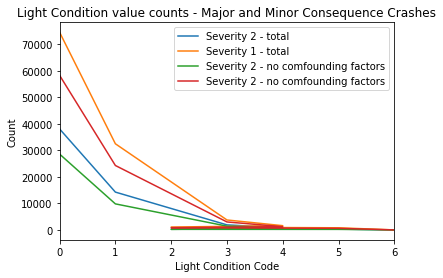

In [37]:
Sev2_df.LIGHTCOND.value_counts().plot(label = 'Severity 2 - total')
Sev1_df.LIGHTCOND.value_counts().plot(label = 'Severity 1 - total')
cleanSev2_df.LIGHTCOND.value_counts().plot(label = 'Severity 2 - no comfounding factors')
cleanSev1_df.LIGHTCOND.value_counts().plot(label = 'Severity 2 - no comfounding factors')

plt.title('Light Condition value counts - Major and Minor Consequence Crashes')
plt.xlabel('Light Condition Code')
plt.ylabel('Count')
plt.legend()

print(Sev2_df.LIGHTCOND.value_counts(),"  ",Sev1_df.LIGHTCOND.value_counts(),"  ",cleanSev2_df.LIGHTCOND.value_counts(),"  ",cleanSev1_df.LIGHTCOND.value_counts())

In [38]:
print(Sev2_df.WEATHER.value_counts(),Sev1_df.WEATHER.value_counts(),cleanSev2_df.WEATHER.value_counts(),cleanSev1_df.WEATHER.value_counts())

0    35582
1    11078
2     8624
4      183
3      164
5       28
6       14
7        7
8        3
Name: WEATHER, dtype: int64 0    73243
1    21570
2    18299
3      661
4      370
5       79
6       32
7       18
8        2
Name: WEATHER, dtype: int64 0    26250
1     8006
2     6337
4      120
3      103
5       21
6       12
7        5
8        3
Name: WEATHER, dtype: int64 0    57330
1    16019
2    14059
3      483
4      268
5       57
6       26
7       15
8        2
Name: WEATHER, dtype: int64


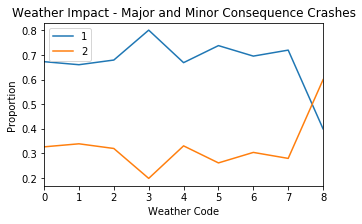

In [20]:
feature_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Weather Impact - Major and Minor Consequence Crashes')
plt.xlabel('Weather Code')
plt.ylabel('Proportion')
plt.legend()

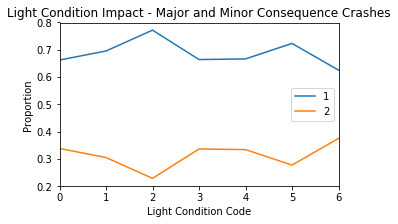

In [21]:
feature_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Light Condition Impact - Major and Minor Consequence Crashes')
plt.xlabel('Light Condition Code')
plt.ylabel('Proportion')
plt.legend()

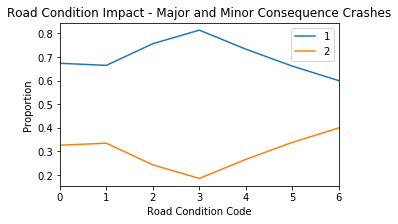

In [23]:
feature_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Road Condition Impact - Major and Minor Consequence Crashes')
plt.xlabel('Road Condition Code')
plt.ylabel('Proportion')
plt.legend()

In [24]:
f1df=feature_df[feature_df.UNDERINFL != 1]

f2df=f1df[f1df.SPEEDING != 1]

cleanfeature_df=f2df[f2df.INATTENTIONIND != 1]

cleanfeature_df.head()

,INCKEY,INCDTTM,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,SEVERITYCODE
0,1307,3/27/2013 2:54:00 PM,2,0,1,0,0,0,2
1,52200,12/20/2006 6:55:00 PM,1,0,1,1,0,0,1
2,26700,11/18/2004 10:20:00 AM,2,0,0,0,0,0,1
3,1144,3/29/2013 9:26:00 AM,0,0,0,0,0,0,1
4,17700,1/28/2004 8:04:00 AM,1,0,1,0,0,0,2


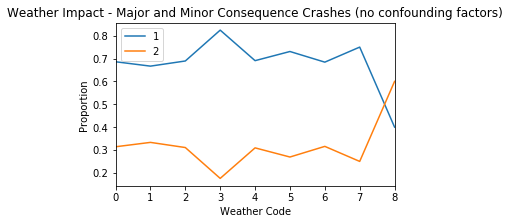

In [26]:
cleanfeature_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Weather Impact - Major and Minor Consequence Crashes (no confounding factors)')
plt.xlabel('Weather Code')
plt.ylabel('Proportion')
plt.legend()

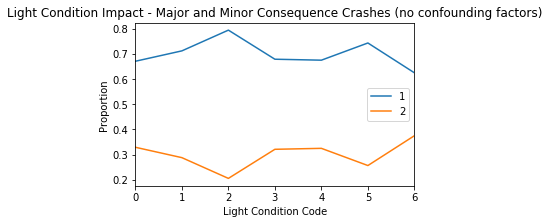

In [27]:
cleanfeature_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Light Condition Impact - Major and Minor Consequence Crashes (no confounding factors)')
plt.xlabel('Light Condition Code')
plt.ylabel('Proportion')
plt.legend()

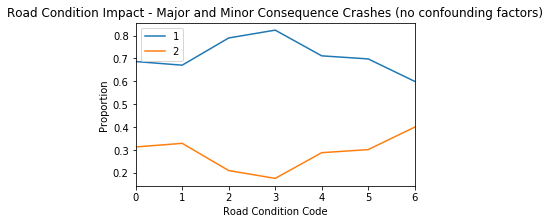

In [29]:
cleanfeature_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(figsize=(5,3))

plt.title('Road Condition Impact - Major and Minor Consequence Crashes (no confounding factors)')
plt.xlabel('Road Condition Code')
plt.ylabel('Proportion')
plt.legend()